## Projet Manipulation image

## Valeurs de couleurs
R ( 8 bits) intensite pour la couleur rouge
G ( 8 bits) intensite pour la couleur verte
B ( 8 bits ) intensite pour la couleur bleu
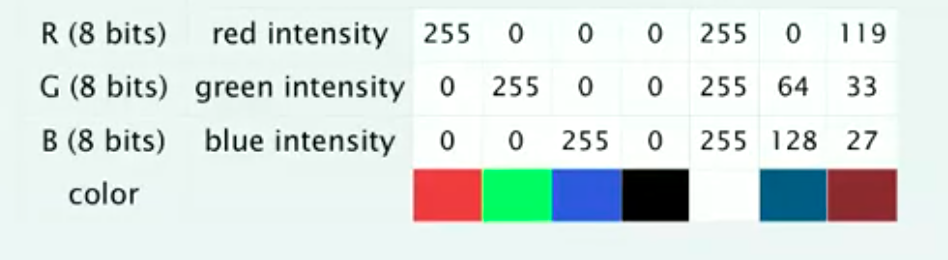

In [746]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.image as mpimg


In [747]:
## Creer votre propre Type de données abstrait Couleur sous python avec les caractériistiques suivants:
class Couleur:
    '''
    Constructeur à 3 paramétres qui represente les valeurs entiéres des différentes couleurs
    '''
    def __init__(self, R, G,B,name = None):
        self.R = R
        self.G = G
        self.B = B
        self.name = name
        
    '''
    Creer une couleur à partir d'une liste
    '''
    @staticmethod
    def creerCouleur(listeRGB):
        R = listeRGB[0]
        G = listeRGB[1]
        B = listeRGB[2]
        col = Couleur(R, G, B)
        return col
            
    
    '''
    Recupération de l'intensite de la couleur rouge
    '''
    def getR(self):
        return self.R
    '''
    Recupération de l'intensite de la couleur verte
    '''
    def getG(self):
        return self.G
    '''
    Recupération de l'intensite de la couleur verte
    '''
    def getB(self):
        return self.B
    '''
    Version brillante de cet objet couleur
    Il faut calculer le meme pourcentage de R,G,B
    Ajouter ces valeurs aux valeurs R,G,B de l'objet couleur originel
    Retourne un objet couleur
    '''
    def brighter(self,pourcentage):
        self.R = self.getR()*(1 + pourcentage)
        self.G = self.getG()*(1 + pourcentage)
        self.B = self.getB()*(1 + pourcentage)
        col = Couleur(self.R, self.G, self.B)
        return col
    '''
    Version sombre de cet objet couleur
    
    Il suffit de multiplier toutes les composantes R, G, B par le pourcentage passé en paramétre
    
    https://graphicdesign.stackexchange.com/questions/75417/how-to-make-a-given-color-a-bit-darker-or-lighter
    
    Retourne un objet couleur
    '''
    def darker(self,pourcentage):
        self.R = self.getR()*(1 - pourcentage)
        self.G = self.getG()*(1 - pourcentage)
        self.B = self.getB()*(1 - pourcentage)
        col = Couleur(self.R, self.G, self.B)
        return col

    '''
    Chaine de caractére representant cet objet couleur
    Retourne un string contenant les valeurs des composantes R,G,B
    '''
    def toString(self):
        return "Couleur ({},{}, {})".format(self.getR(), self.getG(), self.getB())
                                                                        
                                                                        
                                                                        
    '''
    Comparaison de cet objet couleur avec color
    Retourne un booloean
    '''
    def equals(self,color):
        return self.getR() == color.getR() and self.getG() == color.getG() and self.getB() == color.getB()
    '''
     Calcul de la Luminance. La qualité des 
     images dans les écrans plasmas modernes est une combinaison linéaire des trois couleurs et est définie par
     l'equation Y = 0.299r + 0.587g + 0.114b
     
    '''
    def luminance(self):
        return  0.299*self.getR() + 0.587*self.getG() + 0.114*self.getB()
    '''
     Calcul du niveau de gris. Il faut remplacer chaque intensité de couleur par la valeur entiére de la luminance.
     Il faudra créer une nouvelle couleur avec des intensités égales à la luminance
    '''
    def grayScale(self):
        col = Couleur(np.ceil(self.luminance()), np.ceil(self.luminance()), np.ceil(self.luminance()))
        return col
    '''
     Compatibilité deux couleurs. Deux couleurs sont compatibles si la différence de leur luminance fait au moins 128
     Retourne un boolean qui vaut true si les deux couleurs sont compatibles et false sinon
    '''
    def compatible(self, couleur):
        
        return self.luminance() - couleur.luminance()>=128 # retourne un tableau de True or False
    '''
     Addition de couleur
    '''
    def add(self, col):
        self.R = self.getR() + col.getR()
        self.G = self.getG() + col.getG()
        self.B = self.getB() + col.getB()
        col = Couleur(self.R, self.G, self.B)
        return col
    '''
    Fonction permettant d'afficher une couleur dans un cercle. Vous pouvez l'utiliser.
    '''
    def showColor(self):
        fig, ax = plt.subplots()
        # create a grid to plot the color
        grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T
        # add a circle
        circle = mpatches.Circle(grid[0], 0.05, ec="none",color=(self.R/255,self.G/255,self.B/255))
        ax.add_patch(circle)
        #ax.add_line(line)

        plt.axis('equal')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

        
    
   

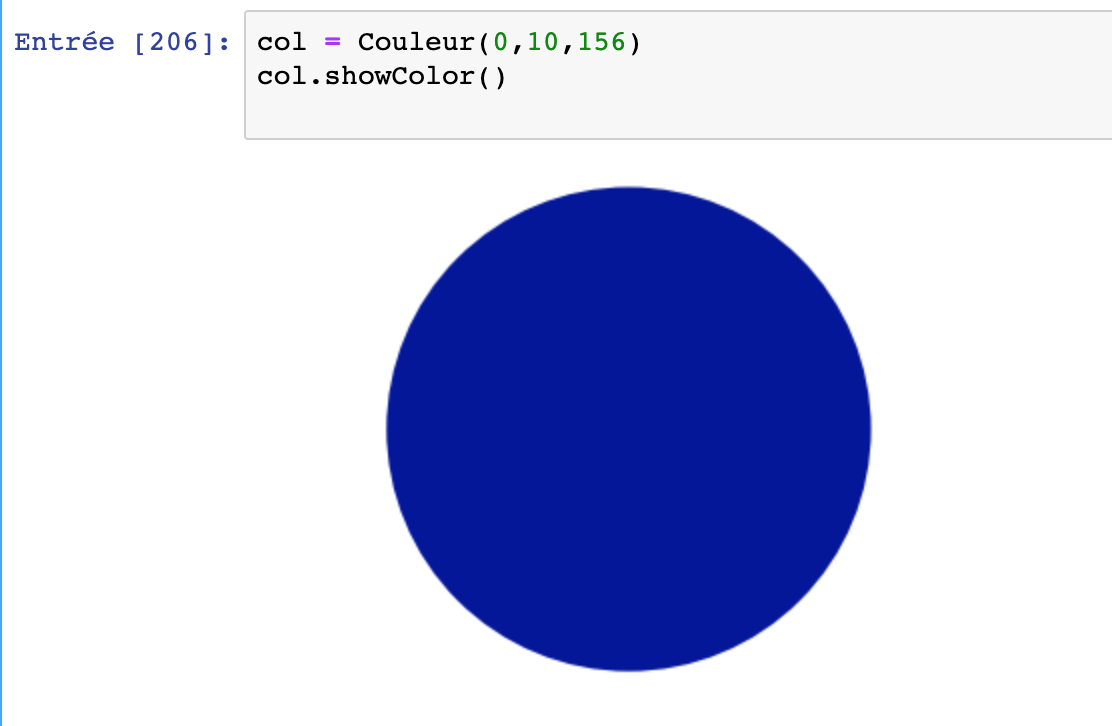

## Traitement d'image. 
Une image numérique est une grille rectangulaire de pixels (éléments d'image), où la couleur de chaque pixel est définie individuellement. Les images numériques sont parfois appelées images tramées ou bitmap. 
Le type de données Image vous permet de manipuler des images numériques. 

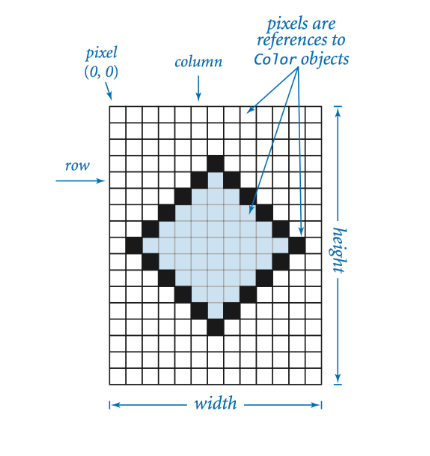
source: https://introcs.cs.princeton.edu/java/31datatype/

L'ensemble de valeurs est une matrice bidimensionnelle de valeurs de couleur, et les opérations sont celles auxquelles vous pouvez vous attendre: créer une image (vierge ou à partir d'un fichier), définir la valeur d'un pixel sur une couleur donnée et extraire la couleur d'un pixel donné. L'API suivante résume les opérations disponibles:

In [748]:
## Image Processing
class Picture:
    '''
    Creer une image à partir d'un fichier en utilisant la fonction imread() de matplotlig.image ou plus généralement la 
    librairie Pillow
    '''
    def __init__(self,nomFichier = None,H = None, W = None):
        if nomFichier == None:
                
            '''
            Creer une image blanche de hauteur H et de largeur W
            '''
            self.H = H
            self.W = W
            self.image = np.zeros((H,W,3))
        else:
                
            '''
            Creer une image à partir d'un fichier
            '''
            self.image = mpimg.imread(nomFichier)
            self.H = self.image.shape[1]
            self.W = self.image.shape[0]
     
    
    '''
    Retourne la hauteur H
    '''
    def getH(self):
        return self.H
    '''
    Retourne la largeur W
    '''
    def getW(self):
        return self.W
    '''
    Retourne le tableau numpy constituant l'image
    '''
    def getImg(self):
        return self.image
    '''
    Retourne les couleurs R,G, B sous forme de liste du pixel à la ligne row et la colonne col
    '''    
    def getCouleur(self,row, col):
        red   = self.getImg()[row, col, 0] # 0 est le rouge
        green = self.getImg()[row, col, 1]  # 1 est le vert
        blue  = self.getImg()[row, col, 2] 
        return [red, green, blue]
    '''
    Modifie les couleurs R,G,B du pixel à la ligne row et la colonne col
    '''
    def setCouleur(self,row, col,couleur):
        self.getImg()[row, col, 0] = couleur.getR()   
        self.getImg()[row, col, 1] = couleur.getG()
        self.getImg()[row, col, 2] = couleur.getB()
        return self.getImg()[row, col, 0], self.getImg()[row, col, 0], self.getImg()[row, col, 0] 
    '''
    Affiche une image
    '''
    def affiche(self):
        plt.imshow(self.image, vmin = 0, vmax = 255)
    '''
    Sauve  une image dans un fichier png
    '''
    def save(self, nomFichier):
        
        plt.imsave(nomFichier, self.image, format = 'png')
    
    
    
    

## Convertir une image couleur en grayscale
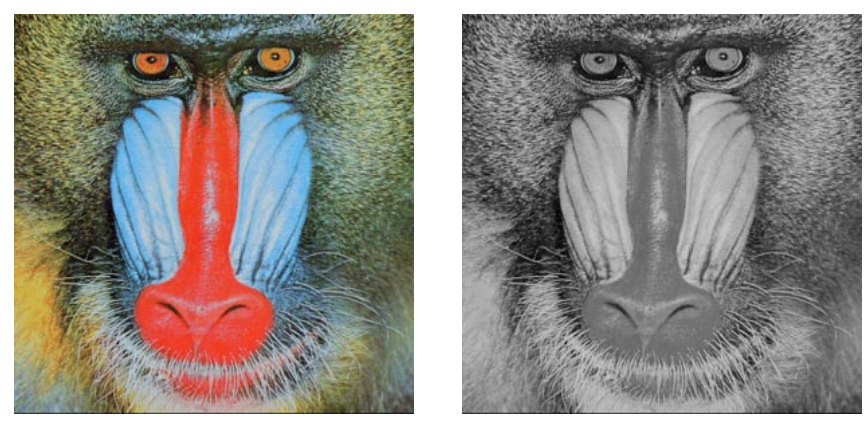



## Changer l'échelle d'une image en inversant la hauteur et la largeur en gardant les mêmes proportions
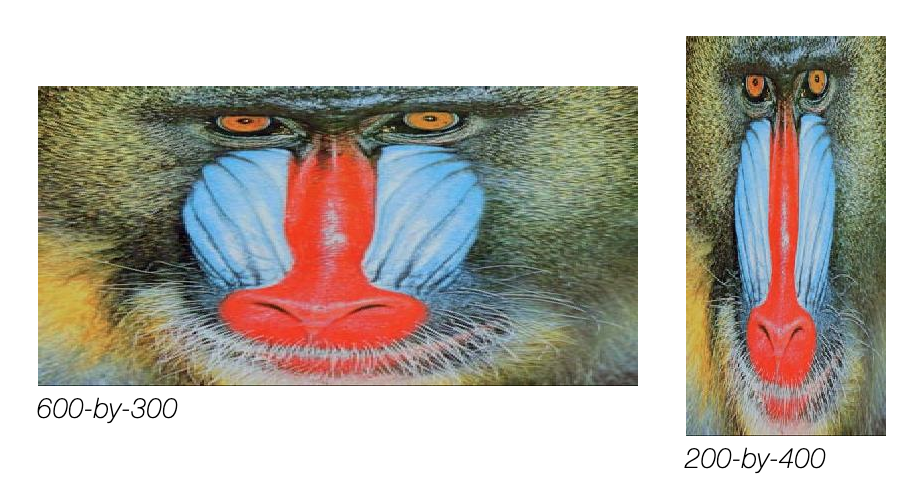



## Separation de couleurs
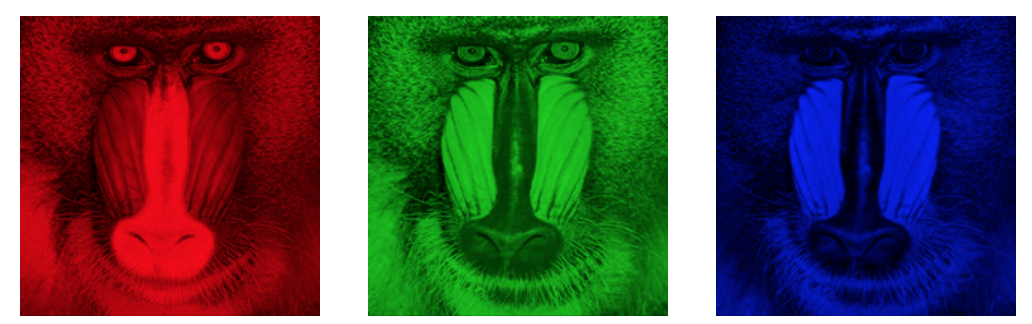

## Glass Filter
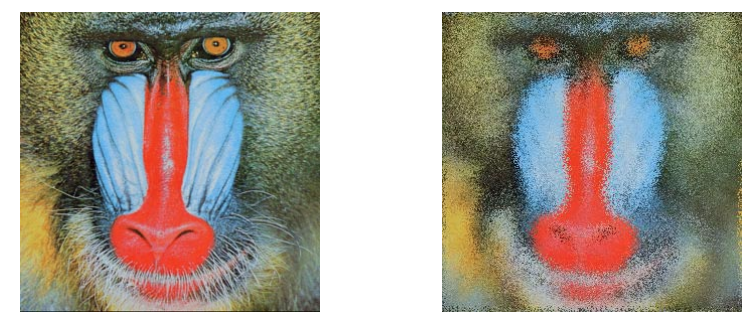

In [749]:
## Image processing
class ImageProcessing:
    
    def __init__(self,image):
        self.image = image
    '''
    Helper function
    '''
    def __calGray__(listePixel): # cette fonction ne fonctionne pas
        A = math.floor(0.299*listePixel[0] + 0.587*listePixel[1] + 0.114*listePixel[2])
        return np.ndarray([A,A,A])
        
    '''
     Transformer en grayscale et visualiser l'image et sa transformée
     Appliquer les fonctions map, reduce ou filter pour reduire la complexite
    '''
    def transformGrayscaleMap(self):
        grayPicture = Picture(path,self.image.W,self.image.H)
        grayPicture.image = map(self.__calGray__,self.image[:, :])
        return grayPicture 
        
    '''
    
     Transformer en grayscale et visualiser l'image et sa transformée
     Une classe gloutonne avec des boucles for
    '''
    
    def transformGrayscaleGlouton(self):
        grayPicture = Picture(None,self.image.W,self.image.H)
        for i in range(grayPicture.H-1):
            for j in range(grayPicture.W-1):
                A = (0.299*self.image.image[i, j, 0] + 0.587*self.image.image[i, j, 1]
                               + 0.114*self.image.image[i, j, 2])
                grayPicture.image[i, j] = np.array([A, A, A]) # mettre chaque pixel en niveau de gris
        return grayPicture 
             
        
    '''
     Creer une image en inversant les proportions de l'image source. Afficher les deux images
    '''
    def transformScale(self):
        pass
    '''
    Separer les couleurs d'une image et visualiser les trois couleurs
    '''
    def separerCouleur(self):
        redPicture = Picture(None,self.image.W,self.image.H)
        greenPicture = Picture(None,self.image.W,self.image.H)
        bluePicture = Picture(None,self.image.W,self.image.H)
        for i in range(redPicture.H-1):
            for j in range(redPicture.W-1):
                redPicture.image[i, j] = np.array([self.image.image[i, j, 0], 0, 0])
                greenPicture.image[i, j] = np.array([0, self.image.image[i, j, 1], 0])
                bluePicture.image[i, j] = np.array([0, 0, self.image.image[i, j, 2]])
        return redPicture, greenPicture, bluePicture
    '''
    Filtre de glace: Affecter à chaque pixel p la couleur d'un pixel voisin choisi alétoirement
    (Les coordonnées du pixel et de p doivent différer d'au plus 5).
    Afficher les deux images 
    '''
    def filtreGlass(self, voisins, glassPicture):
        # choisir un nombre entre entier aléatoirement entre -voisins et voisins
        #glassPicture = Picture(None,self.image.W,self.image.H)
        I = np.zeros((glassPicture.W, 1))
        for i in range(glassPicture.W-1):
            row = np.random.randint(-voisins, voisins)
            I[i] = i + row
            if i+row<0:
                I[i] = 0
            if i+row>=glassPicture.W:
                I[i] = glassPicture.W-1
        J = np.zeros((glassPicture.H, 1))
        for j in range(glassPicture.H-1):
            col = np.random.randint(-voisins, voisins)
            J[j] = j + col
            if j+col<0:
                J[j] = 0
            if j+col>=glassPicture.H:
                J[j] = glassPicture.H-1
        for i in range(glassPicture.W-1):
            for j in range(glassPicture.H-1):
                glassPicture.image[i,j] = glassPicture.image[int(I[i]), int(J[j])]
        return glassPicture

# Création de couleurs

## Utilisation des constructeurs

<Figure size 1440x1440 with 0 Axes>

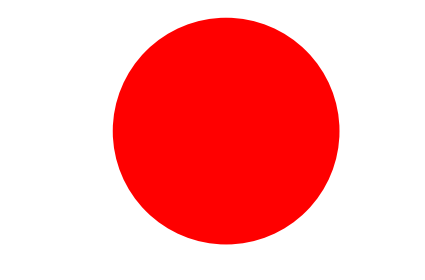

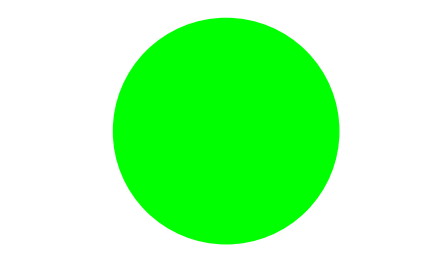

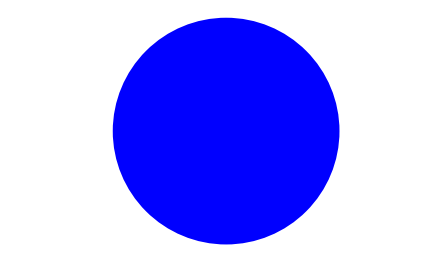

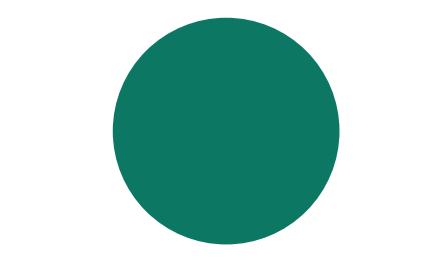

(None, None, None, None)

In [750]:
rouge = Couleur(255, 0, 0)
vert = Couleur(0, 255, 0)
bleu = Couleur(0, 0, 255)
hasard = Couleur(12, 120, 100) # une couleur par hasard

plt.figure(figsize =(20, 20))
rouge.showColor(),vert.showColor(),bleu.showColor(),hasard.showColor()

## Utilisation des méthodes

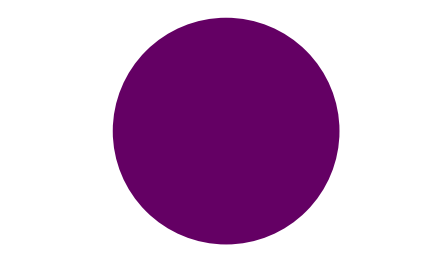

In [751]:
# creerCouleur
liste   = [100, 0, 100]
col = Couleur.creerCouleur(liste) 
col.showColor()

In [752]:
#getR() , get G() , getB()
titi = Couleur(10, 10, 10)
print('intensité rouge : ', titi.getR())
print('intensité vert : ', titi.getG())
print('intensité bleue : ', titi.getB())

intensité rouge :  10
intensité vert :  10
intensité bleue :  10


In [753]:
# brighter(pourcentage)
pourcentage = 10
titi.brighter(pourcentage)
print('intensité rouge : ', titi.getR())
print('intensité vert : ', titi.getG())
print('intensité bleue : ', titi.getB())

intensité rouge :  110
intensité vert :  110
intensité bleue :  110


intensité rouge :  10.999999999999998
intensité vert :  10.999999999999998
intensité bleue :  10.999999999999998


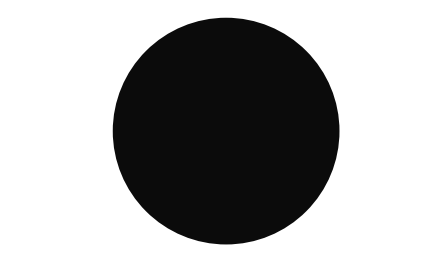

In [754]:
# darker(pourcentage)
pourcentage = 0.9
titi.darker(pourcentage)
print('intensité rouge : ', titi.getR())
print('intensité vert : ', titi.getG())
print('intensité bleue : ', titi.getB())
titi.showColor()

In [755]:
#toString()
titi.toString()

'Couleur (10.999999999999998,10.999999999999998, 10.999999999999998)'

In [756]:
#equals(col)
col1 = Couleur(100, 0, 100)
col1.equals(col) # renvoie un True

True

In [757]:
#equals(col)
titi.equals(col) # renvoie un False

False

In [758]:
# luminance()
col1.luminance()

41.3

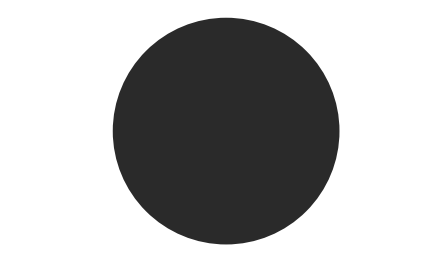

In [759]:
# grayscale()
col1.grayScale().showColor()

In [760]:
# compatible(col)
col1.compatible(titi)

False

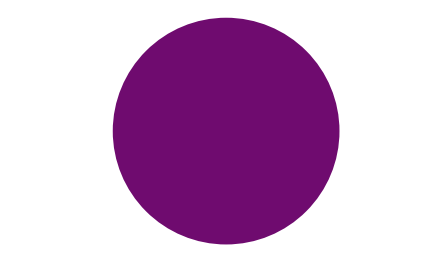

In [761]:
# add(col)
titi.add(col1)
titi.showColor()

# Pictures

In [762]:
picture = Picture('C:/Users/Cindy Luisier/Desktop/Niaga/Seynabou L2 Math/MKM/singe.png') # construction de l'image

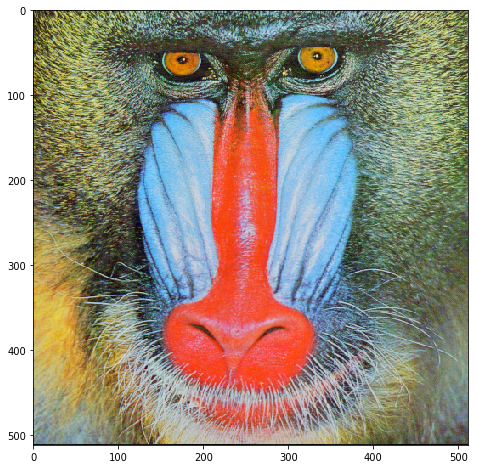

In [763]:
# affichage image
plt.figure(figsize=(12,8))
picture.affiche()

In [764]:
# getH() permet d'avoir la hauteur de l'image
picture.getH()
# getW() permet d'avoir l'épaisseur de l'image
picture.getW()
# getImg() permet d'avoir l'image sous forme matricielle
picture.getImg()

array([[[0.6431373 , 0.5882353 , 0.2784314 ],
        [0.24705882, 0.22352941, 0.12156863],
        [0.29411766, 0.16862746, 0.03921569],
        ...,
        [0.45882353, 0.46666667, 0.26666668],
        [0.5529412 , 0.6666667 , 0.39607844],
        [0.7019608 , 0.7372549 , 0.4627451 ]],

       [[0.47058824, 0.49019608, 0.24313726],
        [0.5294118 , 0.38039216, 0.12941177],
        [0.21568628, 0.13725491, 0.09019608],
        ...,
        [0.47843137, 0.54901963, 0.38431373],
        [0.53333336, 0.62352943, 0.5019608 ],
        [0.47058824, 0.5411765 , 0.2901961 ]],

       [[0.3882353 , 0.2901961 , 0.12156863],
        [0.5176471 , 0.4627451 , 0.18039216],
        [0.23529412, 0.16078432, 0.14117648],
        ...,
        [0.4627451 , 0.3647059 , 0.3529412 ],
        [0.34117648, 0.35686275, 0.3019608 ],
        [0.3764706 , 0.3137255 , 0.19215687]],

       ...,

       [[0.4745098 , 0.5803922 , 0.60784316],
        [0.48235294, 0.6117647 , 0.5882353 ],
        [0.4862745 , 0

In [765]:
picture.getCouleur(0,0)

[0.6431373, 0.5882353, 0.2784314]

# ImagePreprocessing

In [766]:
# utilisation du constructeur
imageprocessing = ImageProcessing(picture)
imageprocessing.image.image

array([[[0.6431373 , 0.5882353 , 0.2784314 ],
        [0.24705882, 0.22352941, 0.12156863],
        [0.29411766, 0.16862746, 0.03921569],
        ...,
        [0.45882353, 0.46666667, 0.26666668],
        [0.5529412 , 0.6666667 , 0.39607844],
        [0.7019608 , 0.7372549 , 0.4627451 ]],

       [[0.47058824, 0.49019608, 0.24313726],
        [0.5294118 , 0.38039216, 0.12941177],
        [0.21568628, 0.13725491, 0.09019608],
        ...,
        [0.47843137, 0.54901963, 0.38431373],
        [0.53333336, 0.62352943, 0.5019608 ],
        [0.47058824, 0.5411765 , 0.2901961 ]],

       [[0.3882353 , 0.2901961 , 0.12156863],
        [0.5176471 , 0.4627451 , 0.18039216],
        [0.23529412, 0.16078432, 0.14117648],
        ...,
        [0.4627451 , 0.3647059 , 0.3529412 ],
        [0.34117648, 0.35686275, 0.3019608 ],
        [0.3764706 , 0.3137255 , 0.19215687]],

       ...,

       [[0.4745098 , 0.5803922 , 0.60784316],
        [0.48235294, 0.6117647 , 0.5882353 ],
        [0.4862745 , 0

In [767]:
# utilisation de transformGayscaleGlouton()
graypicture = imageprocessing.transformGrayscaleGlouton()


(<matplotlib.axes._subplots.AxesSubplot at 0x22968212fd0>,
 Text(0.5, 1.0, 'Gray Picture'))

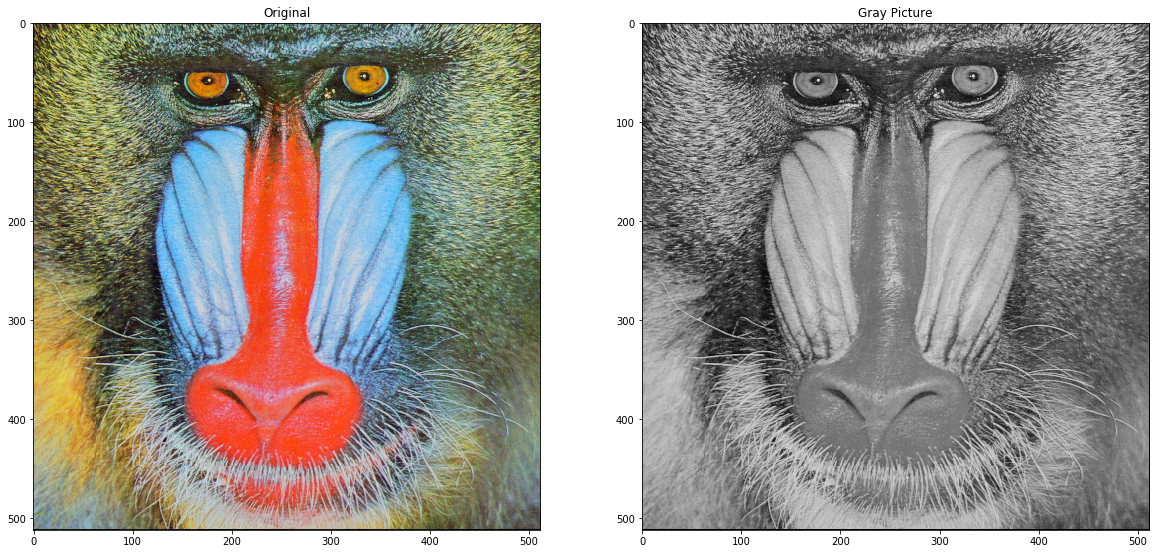

In [768]:
plt.figure(figsize =(20, 20))
plt.subplot(121), plt.imshow(picture.image), plt.title('Original')
plt.subplot(122), plt.imshow(graypicture.image),plt.title('Gray Picture')

In [769]:
redpicture, greenpicture, bluepicture = imageprocessing.separerCouleur()

(<matplotlib.axes._subplots.AxesSubplot at 0x229524c40f0>,
 Text(0.5, 1.0, 'BLUE'))

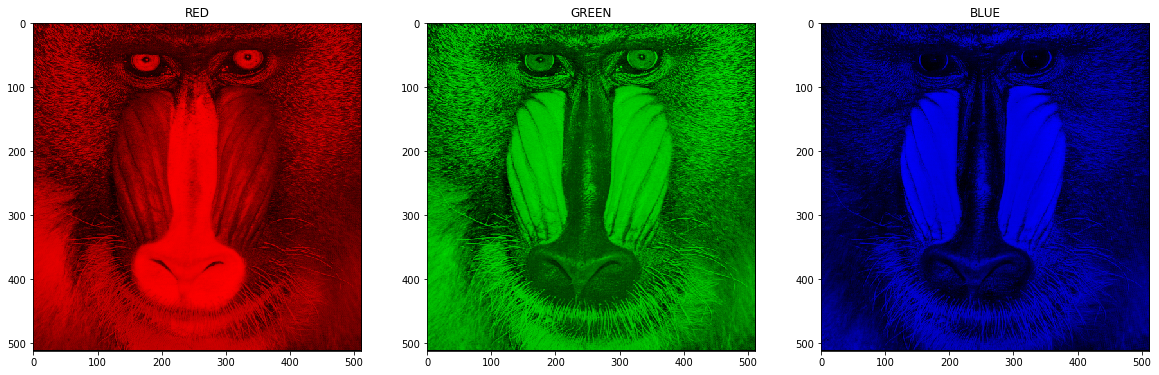

In [770]:
plt.figure(figsize =(20, 20))
plt.subplot(131), plt.imshow(redpicture.image), plt.title('RED')
plt.subplot(132), plt.imshow(greenpicture.image),plt.title('GREEN')
plt.subplot(133), plt.imshow(bluepicture.image),plt.title('BLUE')

Text(0.5, 1.0, 'Glass')

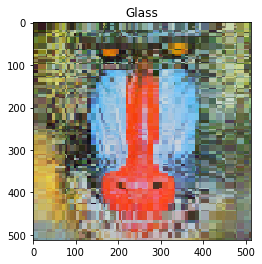

In [771]:
glass = imageprocessing.filtreGlass(1, glassPicture)
#plt.figure(figsize =(8,8))
plt.imshow(glass.image)
plt.title('Glass')